# Mini Project
เปรียบเทียบมูลค่าการส่งออกเเละนำเข้าของสัตว์สิ่งมีชีวิต เเยกตามประเทศ 

# Export

ข้อมูลตลาดส่งออกรายพิกัดศุลกากร

https://data.moc.go.th/OpenData/ExportHarmonizeCountries

API : https://dataapi.moc.go.th/export-harmonize-countries?year=2012&month=1&hs_code=01&limit=

year ปี (ค.ศ.)

month เดือน

hs_code รหัสสินค้าฮาร์โมไนส์ 8 หลัก และ 11 หลัก (สามารถระบุ 2, 4, 6, 8, 11 หลัก)

limit จำนวนข้อมูลที่แสดง

In [5]:
import pandas as pd
import requests
import time

In [ ]:
Export = pd.DataFrame()
yearURL = 2012
monthURL = 1
for i in range(1,131):
  country_name_en = dict()
  month = dict()
  value_baht = dict()
  value_usd = dict()
  year = dict()
  exportMonth = pd.DataFrame()
  if(monthURL == 13):
    monthURL = 1
    yearURL += 1
  else:
    url = "https://dataapi.moc.go.th/export-harmonize-countries?year="+str(yearURL)+"&month="+str(monthURL)+"&hs_code=01&limit="
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    result = requests.get(url, headers=headers)
    r = result.json()
    monthURL+=1

    for i in range(len(r)):
      data_country_code = (r[i])["country_code"]
      data_country_name_en = (r[i])["country_name_en"]
      data_month = (r[i])["month"]
      data_value_baht = (r[i])["value_baht"]
      data_value_usd = (r[i])["value_usd"]
      data_year = (r[i])["year"]

      country_name_en[data_country_code] = data_country_name_en
      month[data_country_code] = data_month
      value_baht[data_country_code] = data_value_baht
      value_usd[data_country_code] = data_value_usd
      year[data_country_code] = data_year

    time.sleep(5)
    exportMonth = pd.DataFrame({"name_en":country_name_en,"month":month,"value_baht":value_baht,"value_usd":value_usd,"year":year})
    Export = pd.concat([Export,exportMonth])

In [ ]:
Export2 = Export.copy()

In [ ]:
Export2 = Export2.reset_index()
Export2 = Export2.rename(columns={"index":"country_code","value_baht": "export_value_baht","value_usd":"export_value_usd"})
Export2

,country_code,name_en,month,export_value_baht,export_value_usd,year
0,LA,LAOS,1,115171944.0,3708596.0,2012
1,KH,CAMBODIA,1,97457362.0,3138178.0,2012
2,MY,MALAYSIA,1,67276094.0,2166325.0,2012
3,HK,HONG KONG,1,40450328.0,1302522.0,2012
4,VN,VIETNAM,1,4235595.0,136388.0,2012
...,...,...,...,...,...,...
7248,MT,MALTA,12,0.0,0.0,2021
7249,CY,CYPRUS,12,0.0,0.0,2021
7250,CI,COTE D'LVOIRE,12,0.0,0.0,2021
7251,UA,UKRAINE,12,0.0,0.0,2021


In [ ]:
Export2["year"] = Export2["year"]+543
Export2

,country_code,name_en,month,export_value_baht,export_value_usd,year
0,LA,LAOS,1,115171944.0,3708596.0,2555
1,KH,CAMBODIA,1,97457362.0,3138178.0,2555
2,MY,MALAYSIA,1,67276094.0,2166325.0,2555
3,HK,HONG KONG,1,40450328.0,1302522.0,2555
4,VN,VIETNAM,1,4235595.0,136388.0,2555
...,...,...,...,...,...,...
7248,MT,MALTA,12,0.0,0.0,2564
7249,CY,CYPRUS,12,0.0,0.0,2564
7250,CI,COTE D'LVOIRE,12,0.0,0.0,2564
7251,UA,UKRAINE,12,0.0,0.0,2564


In [ ]:
!pip install pythainlp

     |████████████████████████████████| 11.5 MB 4.1 MB/s 


In [ ]:
import datetime
from pythainlp.util import thai_strftime

In [ ]:
for i in range(1,13):
  Export2["month"] = Export2["month"].replace(i,thai_strftime(datetime.datetime(1,i,1), "%B"))
Export2

,country_code,name_en,month,export_value_baht,export_value_usd,year
0,LA,LAOS,มกราคม,115171944.0,3708596.0,2555
1,KH,CAMBODIA,มกราคม,97457362.0,3138178.0,2555
2,MY,MALAYSIA,มกราคม,67276094.0,2166325.0,2555
3,HK,HONG KONG,มกราคม,40450328.0,1302522.0,2555
4,VN,VIETNAM,มกราคม,4235595.0,136388.0,2555
...,...,...,...,...,...,...
7248,MT,MALTA,ธันวาคม,0.0,0.0,2564
7249,CY,CYPRUS,ธันวาคม,0.0,0.0,2564
7250,CI,COTE D'LVOIRE,ธันวาคม,0.0,0.0,2564
7251,UA,UKRAINE,ธันวาคม,0.0,0.0,2564


In [ ]:
Export2['name_en'] = Export2['name_en'].str.capitalize()
Export2

,country_code,name_en,month,export_value_baht,export_value_usd,year
0,LA,Laos,มกราคม,115171944.0,3708596.0,2555
1,KH,Cambodia,มกราคม,97457362.0,3138178.0,2555
2,MY,Malaysia,มกราคม,67276094.0,2166325.0,2555
3,HK,Hong kong,มกราคม,40450328.0,1302522.0,2555
4,VN,Vietnam,มกราคม,4235595.0,136388.0,2555
...,...,...,...,...,...,...
7248,MT,Malta,ธันวาคม,0.0,0.0,2564
7249,CY,Cyprus,ธันวาคม,0.0,0.0,2564
7250,CI,Cote d'lvoire,ธันวาคม,0.0,0.0,2564
7251,UA,Ukraine,ธันวาคม,0.0,0.0,2564


In [ ]:
Export2 = Export2[['country_code','name_en','month','year','export_value_baht','export_value_usd']]
Export2

,country_code,name_en,month,year,export_value_baht,export_value_usd
0,LA,Laos,มกราคม,2555,115171944.0,3708596.0
1,KH,Cambodia,มกราคม,2555,97457362.0,3138178.0
2,MY,Malaysia,มกราคม,2555,67276094.0,2166325.0
3,HK,Hong kong,มกราคม,2555,40450328.0,1302522.0
4,VN,Vietnam,มกราคม,2555,4235595.0,136388.0
...,...,...,...,...,...,...
7248,MT,Malta,ธันวาคม,2564,0.0,0.0
7249,CY,Cyprus,ธันวาคม,2564,0.0,0.0
7250,CI,Cote d'lvoire,ธันวาคม,2564,0.0,0.0
7251,UA,Ukraine,ธันวาคม,2564,0.0,0.0


In [ ]:
Export2.dtypes

country_code          object
name_en               object
month                 object
year                   int64
export_value_baht    float64
export_value_usd     float64
dtype: object

In [ ]:
print(Export2[Export2.duplicated()])

Empty DataFrame
Columns: [country_code, name_en, month, year, export_value_baht, export_value_usd]
Index: []


In [ ]:
Export2.isna().sum()

country_code         0
name_en              0
month                0
year                 0
export_value_baht    0
export_value_usd     0
dtype: int64

In [ ]:
Export2

,country_code,name_en,month,year,export_value_baht,export_value_usd
0,LA,Laos,มกราคม,2555,115171944.0,3708596.0
1,KH,Cambodia,มกราคม,2555,97457362.0,3138178.0
2,MY,Malaysia,มกราคม,2555,67276094.0,2166325.0
3,HK,Hong kong,มกราคม,2555,40450328.0,1302522.0
4,VN,Vietnam,มกราคม,2555,4235595.0,136388.0
...,...,...,...,...,...,...
7248,MT,Malta,ธันวาคม,2564,0.0,0.0
7249,CY,Cyprus,ธันวาคม,2564,0.0,0.0
7250,CI,Cote d'lvoire,ธันวาคม,2564,0.0,0.0
7251,UA,Ukraine,ธันวาคม,2564,0.0,0.0


# Import

ข้อมูลตลาดส่งออกรายพิกัดศุลกากร

API : https://dataservices.mof.go.th/api/data/importexport/data_by_product_country?from=2021-01-01&to=2021-01-01&detail=country&key=01&type=import



In [21]:
import pandas as pd
import requests
import time

In [22]:
Import = pd.DataFrame()

yearURL = 2012
monthURL = 1
for i in range(1,131):
  if(monthURL == 13):
    monthURL = 1
    yearURL += 1
  else:
    url = 'https://dataservices.mof.go.th/api/data/importexport/data_by_product_country?from='+str(yearURL)+'-'+str(monthURL)+'-01&to='+str(yearURL)+'-'+str(monthURL)+'-01&detail=country&key=01&type=import'
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    result = requests.get(url, headers=headers)
    r = result.json()
    monthURL+=1

    for i in range(len(r["items"])):
      data = pd.DataFrame.from_dict(((r["items"])[i])["items"])
      Import = pd.concat([Import,data])

    time.sleep(5)
    print("collecting data from",url,". .")

collecting data from https://dataservices.mof.go.th/api/data/importexport/data_by_product_country?from=2012-1-01&to=2012-1-01&detail=country&key=01&type=import . .
collecting data from https://dataservices.mof.go.th/api/data/importexport/data_by_product_country?from=2012-2-01&to=2012-2-01&detail=country&key=01&type=import . .
collecting data from https://dataservices.mof.go.th/api/data/importexport/data_by_product_country?from=2012-3-01&to=2012-3-01&detail=country&key=01&type=import . .
collecting data from https://dataservices.mof.go.th/api/data/importexport/data_by_product_country?from=2012-4-01&to=2012-4-01&detail=country&key=01&type=import . .
collecting data from https://dataservices.mof.go.th/api/data/importexport/data_by_product_country?from=2012-5-01&to=2012-5-01&detail=country&key=01&type=import . .
collecting data from https://dataservices.mof.go.th/api/data/importexport/data_by_product_country?from=2012-6-01&to=2012-6-01&detail=country&key=01&type=import . .
collecting data 

In [23]:
Import2 = Import.copy()

In [24]:
Import2 = Import2.reset_index()
Import2 = Import2.drop(columns=['index'])
Import2 = Import2.rename(columns={"key": "country_code","baht_amnt":"import_value_baht","name":"name_th"})
Import2

,import_value_baht,year_month,name_th,country_code
0,6000.00,มกราคม 2555,กัมพูชา,KH
1,31313.00,มกราคม 2555,กินี,GN
2,17415342.00,มกราคม 2555,แคนาดา,CA
3,904699.00,มกราคม 2555,จีน,CN
4,107098.00,มกราคม 2555,ญี่ปุ่น,JP
...,...,...,...,...
4368,46740.00,ธันวาคม 2564,เอลซัลวาดอร์,SV
4369,17949687.00,ธันวาคม 2564,แอฟริกาใต้,ZA
4370,10000.00,ธันวาคม 2564,ไอร์แลนด์,IE
4371,118366.00,ธันวาคม 2564,ฮ่องกง,HK


In [25]:
Import2[["month","year"]] = Import2["year_month"].str.split("[\s]", expand=True)
Import2 = Import2.drop(columns=['year_month'])
Import2

,import_value_baht,name_th,country_code,month,year
0,6000.00,กัมพูชา,KH,มกราคม,2555
1,31313.00,กินี,GN,มกราคม,2555
2,17415342.00,แคนาดา,CA,มกราคม,2555
3,904699.00,จีน,CN,มกราคม,2555
4,107098.00,ญี่ปุ่น,JP,มกราคม,2555
...,...,...,...,...,...
4368,46740.00,เอลซัลวาดอร์,SV,ธันวาคม,2564
4369,17949687.00,แอฟริกาใต้,ZA,ธันวาคม,2564
4370,10000.00,ไอร์แลนด์,IE,ธันวาคม,2564
4371,118366.00,ฮ่องกง,HK,ธันวาคม,2564


In [26]:
Import2.dtypes

import_value_baht    object
name_th              object
country_code         object
month                object
year                 object
dtype: object

In [27]:
Import2["import_value_baht"] = Import2["import_value_baht"].astype('float')
Import2["year"] = Import2["year"].astype('int')
Import2.dtypes

import_value_baht    float64
name_th               object
country_code          object
month                 object
year                   int64
dtype: object

In [28]:
print(Import2[Import2.duplicated()])

Empty DataFrame
Columns: [import_value_baht, name_th, country_code, month, year]
Index: []


In [29]:
Import2.isna().sum()

import_value_baht    0
name_th              0
country_code         0
month                0
year                 0
dtype: int64

In [30]:
Import2 = Import2[['country_code','name_th','month','year','import_value_baht']]

In [31]:
Import2

,country_code,name_th,month,year,import_value_baht
0,KH,กัมพูชา,มกราคม,2555,6000.0
1,GN,กินี,มกราคม,2555,31313.0
2,CA,แคนาดา,มกราคม,2555,17415342.0
3,CN,จีน,มกราคม,2555,904699.0
4,JP,ญี่ปุ่น,มกราคม,2555,107098.0
...,...,...,...,...,...
4368,SV,เอลซัลวาดอร์,ธันวาคม,2564,46740.0
4369,ZA,แอฟริกาใต้,ธันวาคม,2564,17949687.0
4370,IE,ไอร์แลนด์,ธันวาคม,2564,10000.0
4371,HK,ฮ่องกง,ธันวาคม,2564,118366.0


# Country Code (ISO-3166)

รหัสประเทศ ISO 3166 คือ มาตรฐานที่เผยแพร่โดยองค์การระหว่างประเทศว่าด้วยการมาตรฐาน (ISO) เพื่อกำหนดรหัสสำหรับประเทศ

Web Data : https://th.wikipedia.org/wiki/ISO_3166-1

In [9]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [11]:
url ='https://th.wikipedia.org/wiki/ISO_3166-1'
r = requests.get(url)
soup = BeautifulSoup(r.text, features="html.parser")

In [32]:
table = soup.find('table')

data_iso_wiki = pd.read_html(str(table))

df_iso_wiki = data_iso_wiki[0]
df_iso_wiki = df_iso_wiki.drop(columns=['Alpha-3', 'Numeric', 'รหัส ISO 3166-2','รัฐเอกราช'])
df_iso_wiki = df_iso_wiki.rename(columns={"อังกฤษ": "name_en",'Alpha-2': 'country_code', 'ชื่อประเทศ': 'name_th' })
df_iso_wiki = df_iso_wiki[['country_code','name_en','name_th']]
df_iso_wiki

,country_code,name_en,name_th
0,AF,Afghanistan,อัฟกานิสถาน
1,AX,Åland Islands,หมู่เกาะโอลันด์
2,AL,Albania,แอลเบเนีย
3,DZ,Algeria,แอลจีเรีย
4,AS,American Samoa,อเมริกันซามัว
...,...,...,...
244,WF,Wallis and Futuna,วาลิสและฟูตูนา
245,EH,Western Sahara,เวสเทิร์นสะฮารา
246,YE,Yemen,เยเมน
247,ZM,Zambia,แซมเบีย


In [13]:
print(df_iso_wiki[df_iso_wiki.duplicated()])

Empty DataFrame
Columns: [country_code, name_en, name_th]
Index: []


In [14]:
df_iso_wiki.isna().sum()

country_code    1
name_en         0
name_th         0
dtype: int64

In [15]:
df_iso_wiki[df_iso_wiki.isna().any(axis=1)]

,country_code,name_en,name_th
153,NaN,Namibia,นามิเบีย


In [16]:
df_iso_wiki.loc[[153],"country_code"] = 'NA'
df_iso_wiki.loc[[153]]

,country_code,name_en,name_th
153,NA,Namibia,นามิเบีย


In [17]:
df_iso_wiki.isna().sum()

country_code    0
name_en         0
name_th         0
dtype: int64

In [18]:
df_iso_wiki.dtypes

country_code    object
name_en         object
name_th         object
dtype: object

In [19]:
df_iso_wiki.groupby("name_en")["country_code"].count()

name_en
Afghanistan       1
Albania           1
Algeria           1
American Samoa    1
Andorra           1
                 ..
Western Sahara    1
Yemen             1
Zambia            1
Zimbabwe          1
Åland Islands     1
Name: country_code, Length: 249, dtype: int64

In [20]:
df_iso_wiki

,country_code,name_en,name_th
0,AF,Afghanistan,อัฟกานิสถาน
1,AX,Åland Islands,หมู่เกาะโอลันด์
2,AL,Albania,แอลเบเนีย
3,DZ,Algeria,แอลจีเรีย
4,AS,American Samoa,อเมริกันซามัว
...,...,...,...
244,WF,Wallis and Futuna,วาลิสและฟูตูนา
245,EH,Western Sahara,เวสเทิร์นสะฮารา
246,YE,Yemen,เยเมน
247,ZM,Zambia,แซมเบีย


# Insert Dataframe to mySQL

Username: dataen119

Password: dataen119

Host: db4free.net:3306

Database name: dataen119

*ติดตั้ง* Driver mysqlconnector

In [ ]:
!pip install http://cdn.mysql.com/Downloads/Connector-Python/mysql-connector-python-2.0.4.zip

In [ ]:
from sqlalchemy import types, create_engine
import mysql.connector

In [ ]:
username = 'dataen119'
password = 'dataen119'
host = 'db4free.net:3306'
dbName = 'dataen119'

try:
  database_connection = create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.format(username, password,host, dbName))
  print("MySQL Connection Sucessfull !!")
  # Insret DataFram To MySQL
  df_iso_wiki.to_sql(con=database_connection, name='country', if_exists='replace')
  Export2.to_sql(con=database_connection, name='export_data', if_exists='replace')
  Import2.to_sql(con=database_connection, name='import_data', if_exists='replace')

except Exception as err:
	print("MySQL Connection Failed !!")
	print(err)


# Connect to mySQL

*ติดตั้ง* Driver mysqlconnector

In [33]:
!pip install http://cdn.mysql.com/Downloads/Connector-Python/mysql-connector-python-2.0.4.zip

     |████████████████████████████████| 277 kB 223 kB/s 
  Created wheel for mysql-connector-python: filename=mysql_connector_python-2.0.4-py3-none-any.whl size=128337 sha256=99c87b37627cf14c3144bdc6a363306126990449085bf81fe73af9d4fd494060
  Stored in directory: /root/.cache/pip/wheels/a7/ce/95/e2e5a099d8eebda105ffcc3e67b766e26e07dfb3d9ff526bc8
Successfully built mysql-connector-python


In [34]:
from sqlalchemy import types, create_engine
import mysql.connector

In [35]:
username = 'dataen119'
password = 'dataen119'
host = 'db4free.net:3306'
dbName = 'dataen119'

try:
  database_connection = create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.format(username, password,host, dbName))
  print("MySQL Connection Sucessfull !!")

except Exception as err:
	print("MySQL Connection Failed !!")
	print(err)


MySQL Connection Sucessfull !!


# Dataframe Export And Import

In [52]:
import pandas as pd
import numpy as np

In [37]:
country = pd.read_sql("SELECT * FROM country", database_connection)
country = country.drop(columns=['index'], axis=1)
country

,country_code,name_en,name_th
0,AF,Afghanistan,อัฟกานิสถาน
1,AX,Åland Islands,หมู่เกาะโอลันด์
2,AL,Albania,แอลเบเนีย
3,DZ,Algeria,แอลจีเรีย
4,AS,American Samoa,อเมริกันซามัว
...,...,...,...
244,WF,Wallis and Futuna,วาลิสและฟูตูนา
245,EH,Western Sahara,เวสเทิร์นสะฮารา
246,YE,Yemen,เยเมน
247,ZM,Zambia,แซมเบีย


In [38]:
export_data = pd.read_sql("SELECT * FROM export_data", database_connection)
export_data = export_data.drop(columns=['index'], axis=1)
export_data

,country_code,name_en,month,year,export_value_baht,export_value_usd
0,LA,Laos,มกราคม,2555,115171944.0,3708596.0
1,KH,Cambodia,มกราคม,2555,97457362.0,3138178.0
2,MY,Malaysia,มกราคม,2555,67276094.0,2166325.0
3,HK,Hong kong,มกราคม,2555,40450328.0,1302522.0
4,VN,Vietnam,มกราคม,2555,4235595.0,136388.0
...,...,...,...,...,...,...
7248,MT,Malta,ธันวาคม,2564,0.0,0.0
7249,CY,Cyprus,ธันวาคม,2564,0.0,0.0
7250,CI,Cote d'lvoire,ธันวาคม,2564,0.0,0.0
7251,UA,Ukraine,ธันวาคม,2564,0.0,0.0


In [39]:
import_data = pd.read_sql("SELECT * FROM import_data", database_connection)
import_data = import_data.drop(columns=['index'], axis=1)
import_data

,country_code,name_th,month,year,import_value_baht
0,KH,กัมพูชา,มกราคม,2555,6000.0
1,GN,กินี,มกราคม,2555,31313.0
2,CA,แคนาดา,มกราคม,2555,17415342.0
3,CN,จีน,มกราคม,2555,904699.0
4,JP,ญี่ปุ่น,มกราคม,2555,107098.0
...,...,...,...,...,...
4368,SV,เอลซัลวาดอร์,ธันวาคม,2564,46740.0
4369,ZA,แอฟริกาใต้,ธันวาคม,2564,17949687.0
4370,IE,ไอร์แลนด์,ธันวาคม,2564,10000.0
4371,HK,ฮ่องกง,ธันวาคม,2564,118366.0


In [40]:
all_data = pd.merge(export_data, import_data, how='left', on=['country_code', 'month', 'year'])
all_data

,country_code,name_en,month,year,export_value_baht,export_value_usd,name_th,import_value_baht
0,LA,Laos,มกราคม,2555,115171944.0,3708596.0,NaN,NaN
1,KH,Cambodia,มกราคม,2555,97457362.0,3138178.0,กัมพูชา,6000.0
2,MY,Malaysia,มกราคม,2555,67276094.0,2166325.0,มาเลเซีย,500350.0
3,HK,Hong kong,มกราคม,2555,40450328.0,1302522.0,NaN,NaN
4,VN,Vietnam,มกราคม,2555,4235595.0,136388.0,NaN,NaN
...,...,...,...,...,...,...,...,...
7248,MT,Malta,ธันวาคม,2564,0.0,0.0,NaN,NaN
7249,CY,Cyprus,ธันวาคม,2564,0.0,0.0,NaN,NaN
7250,CI,Cote d'lvoire,ธันวาคม,2564,0.0,0.0,NaN,NaN
7251,UA,Ukraine,ธันวาคม,2564,0.0,0.0,ยูเครน,146010.0


In [41]:
all_data2 = all_data.copy()

In [42]:
print(all_data2[all_data2.duplicated()])

Empty DataFrame
Columns: [country_code, name_en, month, year, export_value_baht, export_value_usd, name_th, import_value_baht]
Index: []


In [43]:
all_data2.isna().sum()

country_code            0
name_en                 0
month                   0
year                    0
export_value_baht       0
export_value_usd        0
name_th              4233
import_value_baht    4233
dtype: int64

In [44]:
all_data2.import_value_baht = all_data2.import_value_baht.fillna(0)
all_data2

,country_code,name_en,month,year,export_value_baht,export_value_usd,name_th,import_value_baht
0,LA,Laos,มกราคม,2555,115171944.0,3708596.0,NaN,0.0
1,KH,Cambodia,มกราคม,2555,97457362.0,3138178.0,กัมพูชา,6000.0
2,MY,Malaysia,มกราคม,2555,67276094.0,2166325.0,มาเลเซีย,500350.0
3,HK,Hong kong,มกราคม,2555,40450328.0,1302522.0,NaN,0.0
4,VN,Vietnam,มกราคม,2555,4235595.0,136388.0,NaN,0.0
...,...,...,...,...,...,...,...,...
7248,MT,Malta,ธันวาคม,2564,0.0,0.0,NaN,0.0
7249,CY,Cyprus,ธันวาคม,2564,0.0,0.0,NaN,0.0
7250,CI,Cote d'lvoire,ธันวาคม,2564,0.0,0.0,NaN,0.0
7251,UA,Ukraine,ธันวาคม,2564,0.0,0.0,ยูเครน,146010.0


In [45]:
all_data2.dtypes

country_code          object
name_en               object
month                 object
year                   int64
export_value_baht    float64
export_value_usd     float64
name_th               object
import_value_baht    float64
dtype: object

In [46]:
all_data2 = pd.merge(all_data2, country, how='left', on=['country_code'])
all_data2

,country_code,name_en_x,month,year,export_value_baht,export_value_usd,name_th_x,import_value_baht,name_en_y,name_th_y
0,LA,Laos,มกราคม,2555,115171944.0,3708596.0,NaN,0.0,Lao People's Democratic Republic,ลาว
1,KH,Cambodia,มกราคม,2555,97457362.0,3138178.0,กัมพูชา,6000.0,Cambodia,กัมพูชา
2,MY,Malaysia,มกราคม,2555,67276094.0,2166325.0,มาเลเซีย,500350.0,Malaysia,มาเลเซีย
3,HK,Hong kong,มกราคม,2555,40450328.0,1302522.0,NaN,0.0,Hong Kong,ฮ่องกง
4,VN,Vietnam,มกราคม,2555,4235595.0,136388.0,NaN,0.0,Viet Nam,เวียดนาม
...,...,...,...,...,...,...,...,...,...,...
7248,MT,Malta,ธันวาคม,2564,0.0,0.0,NaN,0.0,Malta,มอลตา
7249,CY,Cyprus,ธันวาคม,2564,0.0,0.0,NaN,0.0,Cyprus,ไซปรัส
7250,CI,Cote d'lvoire,ธันวาคม,2564,0.0,0.0,NaN,0.0,Côte d'Ivoire,โกตดิวัวร์
7251,UA,Ukraine,ธันวาคม,2564,0.0,0.0,ยูเครน,146010.0,Ukraine,ยูเครน


In [47]:
all_data2 = all_data2.drop(columns=['name_en_y', 'name_th_x'])
all_data2 = all_data2.rename(columns={"name_en_x": "name_en", 'name_th_y': 'name_th' })
all_data2

,country_code,name_en,month,year,export_value_baht,export_value_usd,import_value_baht,name_th
0,LA,Laos,มกราคม,2555,115171944.0,3708596.0,0.0,ลาว
1,KH,Cambodia,มกราคม,2555,97457362.0,3138178.0,6000.0,กัมพูชา
2,MY,Malaysia,มกราคม,2555,67276094.0,2166325.0,500350.0,มาเลเซีย
3,HK,Hong kong,มกราคม,2555,40450328.0,1302522.0,0.0,ฮ่องกง
4,VN,Vietnam,มกราคม,2555,4235595.0,136388.0,0.0,เวียดนาม
...,...,...,...,...,...,...,...,...
7248,MT,Malta,ธันวาคม,2564,0.0,0.0,0.0,มอลตา
7249,CY,Cyprus,ธันวาคม,2564,0.0,0.0,0.0,ไซปรัส
7250,CI,Cote d'lvoire,ธันวาคม,2564,0.0,0.0,0.0,โกตดิวัวร์
7251,UA,Ukraine,ธันวาคม,2564,0.0,0.0,146010.0,ยูเครน


In [48]:
all_data2.isna().sum()

country_code         0
name_en              0
month                0
year                 0
export_value_baht    0
export_value_usd     0
import_value_baht    0
name_th              0
dtype: int64

In [49]:
print(all_data2[all_data2.duplicated()])

Empty DataFrame
Columns: [country_code, name_en, month, year, export_value_baht, export_value_usd, import_value_baht, name_th]
Index: []


In [50]:
all_data2.dtypes

country_code          object
name_en               object
month                 object
year                   int64
export_value_baht    float64
export_value_usd     float64
import_value_baht    float64
name_th               object
dtype: object

In [53]:
all_data2['import_value_usd'] = (all_data2['import_value_baht']*(all_data2['export_value_baht']/all_data2['export_value_usd'])).apply(np.ceil)
all_data2

,country_code,name_en,month,year,export_value_baht,export_value_usd,import_value_baht,name_th,import_value_usd
0,LA,Laos,มกราคม,2555,115171944.0,3708596.0,0.0,ลาว,0.0
1,KH,Cambodia,มกราคม,2555,97457362.0,3138178.0,6000.0,กัมพูชา,186333.0
2,MY,Malaysia,มกราคม,2555,67276094.0,2166325.0,500350.0,มาเลเซีย,15538571.0
3,HK,Hong kong,มกราคม,2555,40450328.0,1302522.0,0.0,ฮ่องกง,0.0
4,VN,Vietnam,มกราคม,2555,4235595.0,136388.0,0.0,เวียดนาม,0.0
...,...,...,...,...,...,...,...,...,...
7248,MT,Malta,ธันวาคม,2564,0.0,0.0,0.0,มอลตา,NaN
7249,CY,Cyprus,ธันวาคม,2564,0.0,0.0,0.0,ไซปรัส,NaN
7250,CI,Cote d'lvoire,ธันวาคม,2564,0.0,0.0,0.0,โกตดิวัวร์,NaN
7251,UA,Ukraine,ธันวาคม,2564,0.0,0.0,146010.0,ยูเครน,NaN


In [54]:
all_data2.import_value_usd = all_data2.import_value_usd.fillna(0)
all_data2

,country_code,name_en,month,year,export_value_baht,export_value_usd,import_value_baht,name_th,import_value_usd
0,LA,Laos,มกราคม,2555,115171944.0,3708596.0,0.0,ลาว,0.0
1,KH,Cambodia,มกราคม,2555,97457362.0,3138178.0,6000.0,กัมพูชา,186333.0
2,MY,Malaysia,มกราคม,2555,67276094.0,2166325.0,500350.0,มาเลเซีย,15538571.0
3,HK,Hong kong,มกราคม,2555,40450328.0,1302522.0,0.0,ฮ่องกง,0.0
4,VN,Vietnam,มกราคม,2555,4235595.0,136388.0,0.0,เวียดนาม,0.0
...,...,...,...,...,...,...,...,...,...
7248,MT,Malta,ธันวาคม,2564,0.0,0.0,0.0,มอลตา,0.0
7249,CY,Cyprus,ธันวาคม,2564,0.0,0.0,0.0,ไซปรัส,0.0
7250,CI,Cote d'lvoire,ธันวาคม,2564,0.0,0.0,0.0,โกตดิวัวร์,0.0
7251,UA,Ukraine,ธันวาคม,2564,0.0,0.0,146010.0,ยูเครน,0.0


In [55]:
all_data2['trade_balance'] = (all_data2['export_value_baht']-all_data2['import_value_baht']).apply(np.ceil)
all_data2

,country_code,name_en,month,year,export_value_baht,export_value_usd,import_value_baht,name_th,import_value_usd,trade_balance
0,LA,Laos,มกราคม,2555,115171944.0,3708596.0,0.0,ลาว,0.0,115171944.0
1,KH,Cambodia,มกราคม,2555,97457362.0,3138178.0,6000.0,กัมพูชา,186333.0,97451362.0
2,MY,Malaysia,มกราคม,2555,67276094.0,2166325.0,500350.0,มาเลเซีย,15538571.0,66775744.0
3,HK,Hong kong,มกราคม,2555,40450328.0,1302522.0,0.0,ฮ่องกง,0.0,40450328.0
4,VN,Vietnam,มกราคม,2555,4235595.0,136388.0,0.0,เวียดนาม,0.0,4235595.0
...,...,...,...,...,...,...,...,...,...,...
7248,MT,Malta,ธันวาคม,2564,0.0,0.0,0.0,มอลตา,0.0,0.0
7249,CY,Cyprus,ธันวาคม,2564,0.0,0.0,0.0,ไซปรัส,0.0,0.0
7250,CI,Cote d'lvoire,ธันวาคม,2564,0.0,0.0,0.0,โกตดิวัวร์,0.0,0.0
7251,UA,Ukraine,ธันวาคม,2564,0.0,0.0,146010.0,ยูเครน,0.0,-146010.0


# Dashboard

In [56]:
# Download Font TH Sarabun New
# Reference from : https://kku.world/thaifontcolab
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [57]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
from matplotlib.ticker import FuncFormatter
%matplotlib inline

mpl.font_manager.fontManager.addfont("thsarabunnew-webfont.ttf")
mpl.rc("font", family="TH Sarabun New", size=14)

In [58]:
all_data3 = all_data2.copy()

In [59]:
top_year = all_data3.groupby('year').sum().drop(columns=['export_value_usd', 'import_value_usd'])
top_year

,export_value_baht,import_value_baht,trade_balance
year,,,
2555,3.995688e+09,1.248761e+09,2.746928e+09
2556,3.518667e+09,1.972372e+09,1.546295e+09
2557,4.747151e+09,3.129601e+09,1.617550e+09
2558,6.435021e+09,2.866443e+09,3.568578e+09
2559,7.377769e+09,2.919644e+09,4.458124e+09
2560,5.506867e+09,3.214567e+09,2.292299e+09
2561,9.446194e+09,3.380635e+09,6.065559e+09
2562,1.183675e+10,2.668586e+09,9.168160e+09
2563,2.322531e+10,2.265631e+09,2.095968e+10


In [60]:
top_export = all_data3.groupby(['country_code','name_en','name_th'])['export_value_baht'].sum()
top_export = pd.DataFrame(top_export)
top_export = top_export.nlargest(5, columns='export_value_baht').reset_index()
top_export

,country_code,name_en,name_th,export_value_baht
0,LA,Laos,ลาว,4.306340e+10
1,KH,Cambodia,กัมพูชา,2.644507e+10
2,VN,Vietnam,เวียดนาม,9.812840e+09
3,MM,Myanmar,พม่า,4.158501e+09
4,MY,Malaysia,มาเลเซีย,3.490393e+09


In [61]:
top_import = all_data3.groupby(['country_code','name_en','name_th'])['import_value_baht'].sum()
top_import = pd.DataFrame(top_import)
top_import = top_import.nlargest(5, columns='import_value_baht').reset_index()
top_import

,country_code,name_en,name_th,import_value_baht
0,MM,Myanmar,พม่า,1.456220e+10
1,US,U.s.a.,สหรัฐ,4.160231e+09
2,NL,Netherlands,เนเธอร์แลนด์,1.221619e+09
3,GB,United kingdom,สหราชอาณาจักร,1.186905e+09
4,FR,France,ฝรั่งเศส,8.340313e+08


In [62]:
top_trade_balance = all_data3.groupby(['country_code','name_en','name_th'])['trade_balance'].sum()
top_trade_balance = pd.DataFrame(top_trade_balance)
top_trade_balance = top_trade_balance.nlargest(5, columns='trade_balance').reset_index()
top_trade_balance

,country_code,name_en,name_th,trade_balance
0,LA,Laos,ลาว,4.306296e+10
1,KH,Cambodia,กัมพูชา,2.640503e+10
2,VN,Vietnam,เวียดนาม,9.811102e+09
3,MY,Malaysia,มาเลเซีย,3.393812e+09
4,NP,Nepal,เนปาล,7.190369e+08


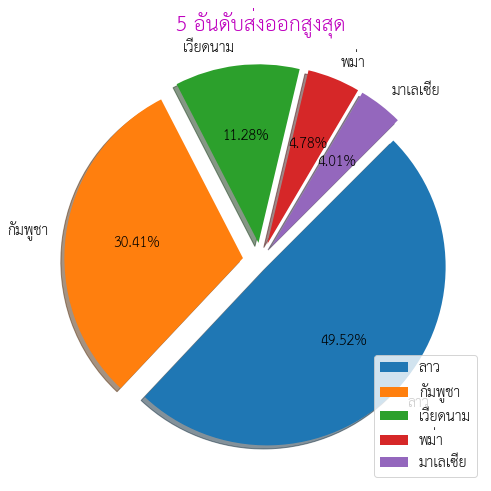

In [63]:
fig = plt.figure(figsize=(8, 12))
data = top_export["export_value_baht"]
theLabel = top_export["name_th"]
explodeValue = [0.05,0.1,0.1,0.1,0.1]
plt.title('5 อันดับส่งออกสูงสุด', color='m' ,fontsize="x-large")
plt.pie(data,labels=theLabel, shadow=True,autopct='%.2f%%',explode = explodeValue,startangle = 45, counterclock=False)
plt.legend(loc='lower right')
plt.show()


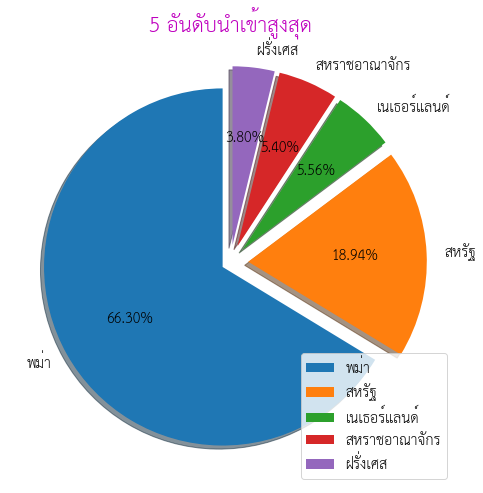

In [64]:
fig = plt.figure(figsize=(8, 12))
data = top_import["import_value_baht"]
theLabel = top_import["name_th"]
explodeValue = [0.05,0.1,0.1,0.1,0.1]
plt.title('5 อันดับนำเข้าสูงสุด', color='m',fontsize="x-large")
plt.pie(data,labels=theLabel, shadow=True,autopct='%.2f%%',explode = explodeValue,startangle = 90)
plt.legend(loc='lower right')
plt.show()

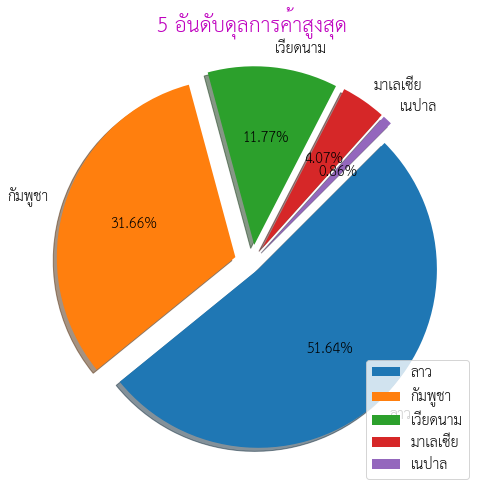

In [65]:
fig = plt.figure(figsize=(8, 12)) 
data = top_trade_balance["trade_balance"]
theLabel = top_trade_balance["name_th"]
explodeValue = [0.05,0.1,0.1,0.1,0.1]
plt.title('5 อันดับดุลการค้าสูงสุด', color='m',fontsize="x-large")
plt.pie(data,labels=theLabel, shadow=True,autopct='%.2f%%',explode = explodeValue,startangle = 45, counterclock=False)
plt.legend(loc='lower right')
plt.show()

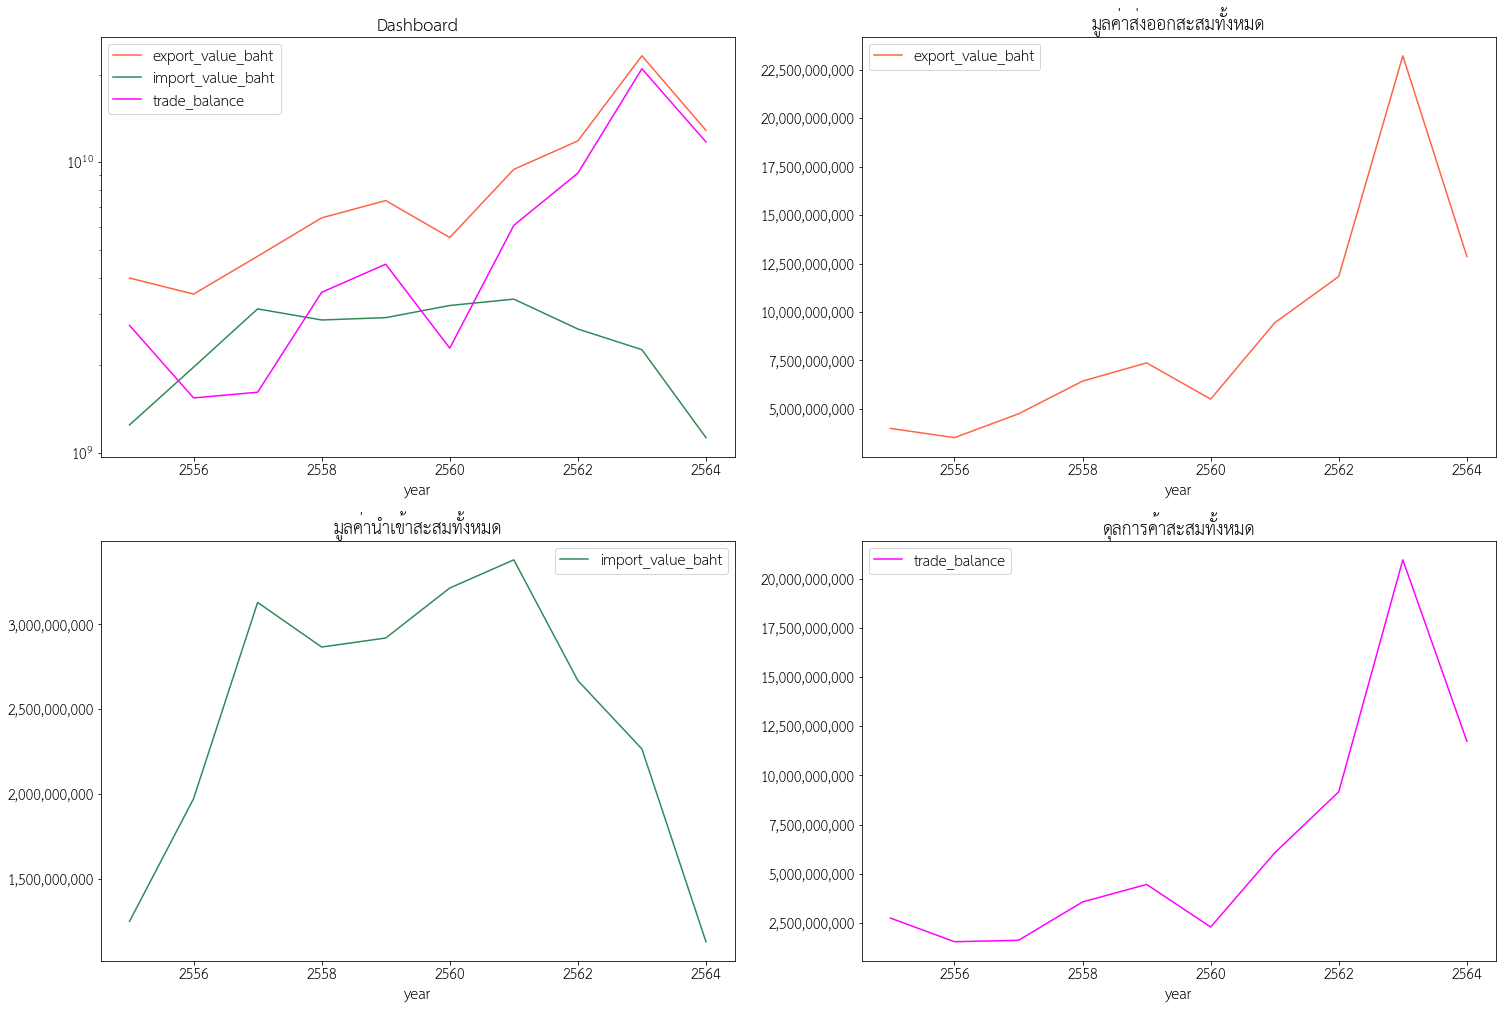

In [66]:
fig, ax = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(25,17))
line_year = top_year.plot(kind='line', logy=True, color=['tomato','seagreen','fuchsia'] ,title='Dashboard', ax=ax[0,0])
line_year = top_year[['export_value_baht']].plot(kind='line',color = ['tomato'] ,title='มูลค่าส่งออกสะสมทั้งหมด', ax=ax[0,1]).yaxis.set_major_formatter(FuncFormatter(lambda v, p: "{:,.0f}".format(v)))
line_year = top_year[['import_value_baht']].plot(kind='line',color = ['seagreen'] ,title='มูลค่านำเข้าสะสมทั้งหมด', ax=ax[1,0]).yaxis.set_major_formatter(FuncFormatter(lambda v, p: "{:,.0f}".format(v)))
line_year = top_year[['trade_balance']].plot(kind='line',color = ['fuchsia'] ,title='ดุลการค้าสะสมทั้งหมด', ax=ax[1,1]).yaxis.set_major_formatter(FuncFormatter(lambda v, p: "{:,.0f}".format(v)));